<a href="https://colab.research.google.com/github/MiguelSca/ProjectUAL2021/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

# Início

## 3. Preparação do DataFrame

In [6]:
pd.read_csv("/content/drive/MyDrive/Curso_Logistica/dataset_trat.csv")

,ID;SAFRA;LIMIT_BAL;SEX;EDUCATION;MARRIAGE;AGE;PAY_0;PAY_2;PAY_3;PAY_4;PAY_5;PAY_6;BILL_AMT1;BILL_AMT2;BILL_AMT3;BILL_AMT4;BILL_AMT5;BILL_AMT6;PAY_AMT1;PAY_AMT2;PAY_AMT3;PAY_AMT4;PAY_AMT5;PAY_AMT6;default
0,1;200510;20000;2;2;1;24;2;2;-1;-1;-2;-2;3913;3...
1,2;200510;120000;2;2;2;26;-1;2;0;0;0;2;2682;172...
2,3;200510;90000;2;2;2;34;0;0;0;0;0;0;29239;1402...
3,4;200510;50000;2;2;1;37;0;0;0;0;0;0;46990;4823...
4,5;200510;50000;1;2;1;57;-1;0;-1;0;0;0;8617;567...
...,...
29995,29996;200607;220000;1;3;1;39;0;0;0;0;0;0;18894...
29996,29997;200607;150000;1;3;2;43;-1;-1;-1;-1;0;0;1...
29997,29998;200607;30000;1;2;2;37;4;3;2;-1;0;0;3565;...
29998,29999;200607;80000;1;3;1;41;1;-1;0;0;0;-1;-164...


In [9]:
dados = pd.read_csv("/content/drive/MyDrive/Curso_Logistica/dataset_trat.csv", sep=";")
dados.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,200510,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,200510,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,200510,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,200510,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,200510,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Transformações


In [10]:
dados["SUM_BILL"] = dados["BILL_AMT1"] + dados["BILL_AMT2"] + dados["BILL_AMT3"] + dados["BILL_AMT4"]+ dados["BILL_AMT5"]+ dados["BILL_AMT6"]
dados["AVG_BILL"] = dados["SUM_BILL"]/6
dados["max_BILL"] = dados[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6",]].max(axis=1)
dados.head()


,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SUM_BILL,AVG_BILL,max_BILL
0,1,200510,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,1284.000000,3913
1,2,200510,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,2846.166667,3455
2,3,200510,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,16942.166667,29239
3,4,200510,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,38555.666667,49291
4,5,200510,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,18223.166667,35835


In [11]:
dados["SUM_PAY"] = dados["PAY_AMT1"] + dados["PAY_AMT2"] + dados["PAY_AMT3"] + dados["PAY_AMT4"]+ dados["PAY_AMT5"]+ dados["PAY_AMT6"]
dados["AVG_PAY"] = dados["SUM_PAY"]/6
dados["max_PAY"] = dados[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6",]].max(axis=1)
dados.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
0,1,200510,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,1284.000000,3913,689,114.833333,689
1,2,200510,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,2846.166667,3455,5000,833.333333,2000
2,3,200510,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,16942.166667,29239,11018,1836.333333,5000
3,4,200510,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,38555.666667,49291,8388,1398.000000,2019
4,5,200510,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,18223.166667,35835,59049,9841.500000,36681



# DIVISAO DO CONJUNTO DE DADOS


In [12]:
OOT = dados.loc[dados["SAFRA"] >= 200605] 
OOT["SAFRA"].groupby(OOT["SAFRA"]).count()

SAFRA
200605    3000
200606    3000
200607    3000
Name: SAFRA, dtype: int64

In [13]:
DEV = dados.loc[dados["SAFRA"] <  200605] 
DEV["SAFRA"].groupby(DEV["SAFRA"]).count()

SAFRA
200510    3000
200511    3000
200512    3000
200601    3000
200602    3000
200603    3000
200604    3000
Name: SAFRA, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split


In [15]:

X_train, X_test, y_train, y_test = train_test_split(DEV.drop(columns= ["default"]), DEV["default"], test_size=0.3, random_state=123)

X_train["SAFRA"].groupby(X_train["SAFRA"]).count() 

SAFRA
200510    2103
200511    2124
200512    2110
200601    2081
200602    2075
200603    2102
200604    2105
Name: SAFRA, dtype: int64

In [16]:
X_test["SAFRA"].groupby(X_test["SAFRA"]).count()  


SAFRA
200510    897
200511    876
200512    890
200601    919
200602    925
200603    898
200604    895
Name: SAFRA, dtype: int64

In [17]:
X_train.to_csv('/content/drive/MyDrive/Curso_Logistica/X_train.csv')

# 4. Data Understanding

## Análise descritiva e exploratória

In [18]:
!pip install http://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     \ 38.3MB 903kB/s
     |████████████████████████████████| 10.1MB 6.7MB/s 
     |████████████████████████████████| 645kB 40.1MB/s 
     |████████████████████████████████| 112kB 53.5MB/s 
     |████████████████████████████████| 1.1MB 32.3MB/s 
     |████████████████████████████████| 3.1MB 30.6MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 819kB 33.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=0cced8cc5392425ad8faf900e6e1cf1d732c7269dc7140460df3e7993ea650f1
  Stored in directory: /tmp/pip-ephem-wheel-cache-wkaypk4h/wheels/24/75/7b/eddcbfba9dba6272085ddd64d027aa1d55940b927454f14fa8
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=90760ba6ed38d50cefb2409a1dd82aeedf3380b1013e05c7c48e355ce3ebc996
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f940

In [19]:
from pandas_profiling import ProfileReport
profile = ProfileReport(X_train,minimal=True)

In [20]:
profile.to_file("/content/drive/MyDrive/Curso_Logistica/descritiva.html")

Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
X_train.loc[X_train['BILL_AMT1'] < 0, 'BILL_AMT1'] = -1 
X_train.loc[X_train['BILL_AMT2'] < 0, 'BILL_AMT2'] = -1 
X_train.loc[X_train['BILL_AMT3'] < 0, 'BILL_AMT3'] = -1 
X_train.loc[X_train['BILL_AMT4'] < 0, 'BILL_AMT4'] = -1 
X_train.loc[X_train['BILL_AMT5'] < 0, 'BILL_AMT5'] = -1 
X_train.loc[X_train['BILL_AMT6'] < 0, 'BILL_AMT6'] = -1 

In [22]:
X_train['BILL_AMT2'].describe()

count     14700.000000
mean      47800.835102
std       68385.272659
min          -1.000000
25%        3158.500000
50%       21085.500000
75%       62051.250000
max      646770.000000
Name: BILL_AMT2, dtype: float64

In [23]:
X_train.loc[X_train['PAY_AMT1']  > 18006.25, 'PAY_AMT1'] = 18006.29 
X_train.loc[X_train['PAY_AMT2']  > 18987.5, 'PAY_AMT2'] = 18987.5 
X_train.loc[X_train['PAY_AMT3']  > 15500.7, 'PAY_AMT3'] = 15500.7 
X_train.loc[X_train['PAY_AMT4']  > 15150.9, 'PAY_AMT4'] = 15150.9
X_train.loc[X_train['PAY_AMT5']  > 15620.05, 'PAY_AMT5'] = 15620.05
X_train.loc[X_train['PAY_AMT6']  > 16992.4, 'PAY_AMT6'] = 16992.4 

In [24]:
X_train['PAY_AMT4'].describe() 

count    14700.000000
mean      3035.039150
std       4019.149798
min          0.000000
25%        247.000000
50%       1498.500000
75%       4000.000000
max      15150.900000
Name: PAY_AMT4, dtype: float64

In [ ]:
profile.to_file("/content/drive/MyDrive/Curso_Logistica/discritiva2.html")


Summarize dataset:   0%|          | 0/40 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
X_train_trat = X_train.copy()

In [26]:
X_train_trat.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
10910,10911,200601,220000,2,2,1,53,0,0,0,0,0,0,207592,212099,214669,173187,176496,169649,8165.0,6889.0,6033.0,6247.0,6142.0,6146.0,1153692,192282.000000,214669,39622,6603.666667,8165
12563,12564,200602,300000,2,1,2,31,0,0,0,-1,-1,-1,11158,1616,3658,658,662,0,1000.0,2700.0,658.0,662.0,0.0,0.0,17752,2958.666667,11158,5020,836.666667,2700
369,370,200510,20000,2,2,1,32,3,2,0,0,0,0,20631,20010,19703,11084,10918,10985,0.0,1168.0,384.0,390.0,632.0,616.0,93331,15555.166667,20631,3190,531.666667,1168
7702,7703,200512,410000,1,3,2,38,-1,-1,-1,-1,-1,-1,4822,232,2255,2546,2650,6286,233.0,2266.0,2558.0,2663.0,6303.0,12.0,18791,3131.833333,6286,14035,2339.166667,6303
7464,7465,200512,100000,2,2,2,25,0,0,0,-1,-1,-1,8791,4910,0,674,0,980,1000.0,0.0,674.0,0.0,980.0,4413.0,15355,2559.166667,8791,7067,1177.833333,4413


# 5. Data Preparation Feature Selection -

# Avaliação da relevância e redundância dos atributos


In [27]:
! pip install optbinning


     |████████████████████████████████| 174kB 8.6MB/s 
     |████████████████████████████████| 184kB 16.2MB/s 
     |████████████████████████████████| 14.4MB 217kB/s 
  Created wheel for pympler: filename=Pympler-0.9-cp37-none-any.whl size=164825 sha256=663970c920c4d9bc8be68626796ef15e5b5b80fe845fc73fa61fc4636619e570
  Stored in directory: /root/.cache/pip/wheels/23/15/5a/90dd23b3ceffcf8463dc737fba4fad3e295d1da52622bbb74f
  Created wheel for accumulation-tree: filename=accumulation_tree-0.6.2-cp37-cp37m-linux_x86_64.whl size=234377 sha256=2d143a1c5c8489d67a3d5e7524f6813d5dbbb46c4d98e717c283ce3b5a40d885
  Stored in directory: /root/.cache/pip/wheels/a7/76/fa/3fbcbcf87da8668138b93f9668f56e1029f7d72c7f6a51ab1a
  Created wheel for pyudorandom: filename=pyudorandom-1.0.0-cp37-none-any.whl size=2223 sha256=49723cc2ff3e8f394f634868419dee9218ebb3becd7c5015a0519c3f2d097b5d
  Stored in directory: /root/.cache/pip/wheels/18/0e/0c/ec5ba8bed98cea9fea1cee32ee83b57a5dfb2974b2777ac5a3
Successfully bui

In [28]:
from optbinning import OptimalBinning
from optbinning import BinningProcess

In [29]:
X_train_trat.set_index(['ID','SAFRA'],inplace=True)
X_train_trat.head()

,,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
ID,SAFRA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10911,200601,220000,2,2,1,53,0,0,0,0,0,0,207592,212099,214669,173187,176496,169649,8165.0,6889.0,6033.0,6247.0,6142.0,6146.0,1153692,192282.000000,214669,39622,6603.666667,8165
12564,200602,300000,2,1,2,31,0,0,0,-1,-1,-1,11158,1616,3658,658,662,0,1000.0,2700.0,658.0,662.0,0.0,0.0,17752,2958.666667,11158,5020,836.666667,2700
370,200510,20000,2,2,1,32,3,2,0,0,0,0,20631,20010,19703,11084,10918,10985,0.0,1168.0,384.0,390.0,632.0,616.0,93331,15555.166667,20631,3190,531.666667,1168
7703,200512,410000,1,3,2,38,-1,-1,-1,-1,-1,-1,4822,232,2255,2546,2650,6286,233.0,2266.0,2558.0,2663.0,6303.0,12.0,18791,3131.833333,6286,14035,2339.166667,6303
7465,200512,100000,2,2,2,25,0,0,0,-1,-1,-1,8791,4910,0,674,0,980,1000.0,0.0,674.0,0.0,980.0,4413.0,15355,2559.166667,8791,7067,1177.833333,4413


In [31]:
X_train_trat.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SUM_BILL',
       'AVG_BILL', 'max_BILL', 'SUM_PAY', 'AVG_PAY', 'max_PAY'],
      dtype='object')

In [32]:

variable_names =['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',\
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',\
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',\
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SUM_BILL',\
       'AVG_BILL', 'max_BILL', 'SUM_PAY', 'AVG_PAY', 'max_PAY']
variable_names


['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SUM_BILL',
 'AVG_BILL',
 'max_BILL',
 'SUM_PAY',
 'AVG_PAY',
 'max_PAY']

In [33]:
categorical_variables = [ 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',\
                         'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
categorical_variables

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [34]:
binning_process = BinningProcess(variable_names, categorical_variables = categorical_variables,min_prebin_size = 0.1, max_n_bins=3)


In [35]:


binning_process.fit(X_train_trat, y_train)

BinningProcess(binning_fit_params=None, binning_transform_params=None,
               categorical_variables=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                                      'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                      'PAY_6'],
               max_bin_size=None, max_n_bins=3, max_n_prebins=20,
               max_pvalue=None, max_pvalue_policy='consecutive',
               min_bin_size=None, min_n_bins=None, min_prebin_size=0.1,
               n_jobs=None, selection_criteria...None,
               split_digits=None,
               variable_names=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
                               'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                               'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                               'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                               'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                               'PAY_AMT4', 'PAY_AMT5', 'PAY_A

In [36]:

binning_process.summary().sort_values(by=['iv'], ascending=False)

,name,dtype,status,selected,n_bins,iv,js,gini,quality_score
5,PAY_0,categorical,OPTIMAL,True,3,0.850967,0.0955828,0.401391,0.171401
6,PAY_2,categorical,OPTIMAL,True,3,0.536533,0.0628168,0.307276,0.481239
7,PAY_3,categorical,OPTIMAL,True,3,0.389394,0.0461675,0.253835,0.529777
9,PAY_5,categorical,OPTIMAL,True,3,0.329166,0.0384737,0.214578,0.552183
8,PAY_4,categorical,OPTIMAL,True,3,0.324249,0.0382327,0.217414,0.549124
10,PAY_6,categorical,OPTIMAL,True,3,0.27638,0.0327123,0.198881,0.527896
17,PAY_AMT1,numerical,OPTIMAL,True,3,0.189392,0.0232568,0.222782,0.524348
27,AVG_PAY,numerical,OPTIMAL,True,3,0.183768,0.022537,0.213748,0.508916
26,SUM_PAY,numerical,OPTIMAL,True,3,0.183768,0.022537,0.213748,0.508916
28,max_PAY,numerical,OPTIMAL,True,3,0.142996,0.017606,0.189637,0.419561


Salvar o projecto

In [37]:

X_train_transf = binning_process.transform(X_train_trat,metric='bins')

In [38]:
X_train_transf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
0,"[125000.00, inf)",[2],[2],[1 3],"[41.50, inf)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[ 0 -2 6],[ 0 -2],[ 0 -2],"[65968.50, inf)","[35166.00, inf)","[32102.00, inf)","[8438.00, inf)","[8150.50, inf)","[5865.00, inf)","[4902.50, inf)","[4966.50, inf)","[2918.50, inf)","[2851.50, inf)","[3997.50, inf)","[3781.00, inf)","[290629.00, inf)","[48438.17, inf)","[35558.00, inf)","[13302.50, 60701.50)","[2217.08, 10116.92)","[4873.50, 24396.00)"
1,"[125000.00, inf)",[2],[0 4 6 5 1],[0 2],"[25.50, 41.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[-inf, 2509.00)","[-inf, 1326.50)","[-inf, 399.50)","[21.50, 4902.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[-inf, 0.50)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"
2,"[-inf, 45000.00)",[2],[2],[1 3],"[25.50, 41.50)",[6 5 8 4 2 3 7],[4 2 7 3 5 6],[-1 0],[ 0 -2 6],[ 0 -2],[ 0 -2],"[781.50, 65968.50)","[11880.50, 35166.00)","[12238.00, 32102.00)","[8438.00, inf)","[8150.50, inf)","[5865.00, inf)","[-inf, 21.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[0.50, 3997.50)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"
3,"[125000.00, inf)",[1],[3],[0 2],"[25.50, 41.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[2509.00, 8438.00)","[1326.50, 8150.50)","[5865.00, inf)","[21.50, 4902.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[3997.50, inf)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[13302.50, 60701.50)","[2217.08, 10116.92)","[4873.50, 24396.00)"
4,"[45000.00, 125000.00)",[2],[2],[0 2],"[-inf, 25.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[-inf, 2509.00)","[-inf, 1326.50)","[399.50, 5865.00)","[21.50, 4902.50)","[-inf, 91.00)","[1.50, 2918.50)","[-inf, 11.50)","[0.50, 3997.50)","[3781.00, inf)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"


# Avaliar determinada variável

In [39]:
optb = binning_process.get_binned_variable("PAY_0")

In [40]:
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[0, -2, -1]",11207,0.762381,9605,1602,0.142946,0.581567,0.217566,0.026819
1,[1],1868,0.127075,1217,651,0.348501,-0.583829,0.049758,0.006133
2,"[6, 5, 8, 4, 2, 3, 7]",1625,0.110544,500,1125,0.692308,-2.02039,0.583642,0.062631
3,Special,0,0.000000,0,0,0.000000,0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0,0.000000,0.000000
Totals,,14700,1.000000,11322,3378,0.229796,,0.850967,0.095583


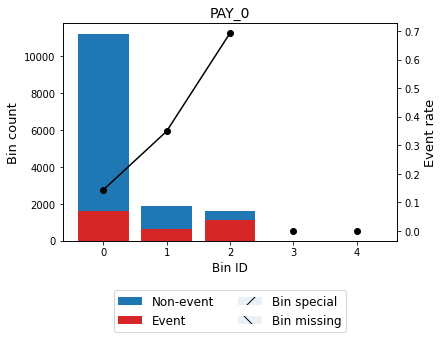

In [41]:
optb.binning_table.plot(metric="event_rate")

In [42]:
profile = ProfileReport(X_train_transf)

In [ ]:
profile.to_file("/content/drive/MyDrive/Curso_Logistica/descritiva2.html")

Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
X_train_transf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
0,"[125000.00, inf)",[2],[2],[1 3],"[41.50, inf)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[ 0 -2 6],[ 0 -2],[ 0 -2],"[65968.50, inf)","[35166.00, inf)","[32102.00, inf)","[8438.00, inf)","[8150.50, inf)","[5865.00, inf)","[4902.50, inf)","[4966.50, inf)","[2918.50, inf)","[2851.50, inf)","[3997.50, inf)","[3781.00, inf)","[290629.00, inf)","[48438.17, inf)","[35558.00, inf)","[13302.50, 60701.50)","[2217.08, 10116.92)","[4873.50, 24396.00)"
1,"[125000.00, inf)",[2],[0 4 6 5 1],[0 2],"[25.50, 41.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[-inf, 2509.00)","[-inf, 1326.50)","[-inf, 399.50)","[21.50, 4902.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[-inf, 0.50)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"
2,"[-inf, 45000.00)",[2],[2],[1 3],"[25.50, 41.50)",[6 5 8 4 2 3 7],[4 2 7 3 5 6],[-1 0],[ 0 -2 6],[ 0 -2],[ 0 -2],"[781.50, 65968.50)","[11880.50, 35166.00)","[12238.00, 32102.00)","[8438.00, inf)","[8150.50, inf)","[5865.00, inf)","[-inf, 21.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[0.50, 3997.50)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"
3,"[125000.00, inf)",[1],[3],[0 2],"[25.50, 41.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[2509.00, 8438.00)","[1326.50, 8150.50)","[5865.00, inf)","[21.50, 4902.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[3997.50, inf)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[13302.50, 60701.50)","[2217.08, 10116.92)","[4873.50, 24396.00)"
4,"[45000.00, 125000.00)",[2],[2],[0 2],"[-inf, 25.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[-inf, 2509.00)","[-inf, 1326.50)","[399.50, 5865.00)","[21.50, 4902.50)","[-inf, 91.00)","[1.50, 2918.50)","[-inf, 11.50)","[0.50, 3997.50)","[3781.00, inf)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"


# Cálculo de Correlações (CrammerV)

In [44]:
import scipy.stats as ss 
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [45]:
cramers_v(pd.crosstab(X_train_transf['LIMIT_BAL'],X_train_transf['EDUCATION']))

0.19157829337793875

In [46]:
! pip install dython

In [47]:
from dython import nominal

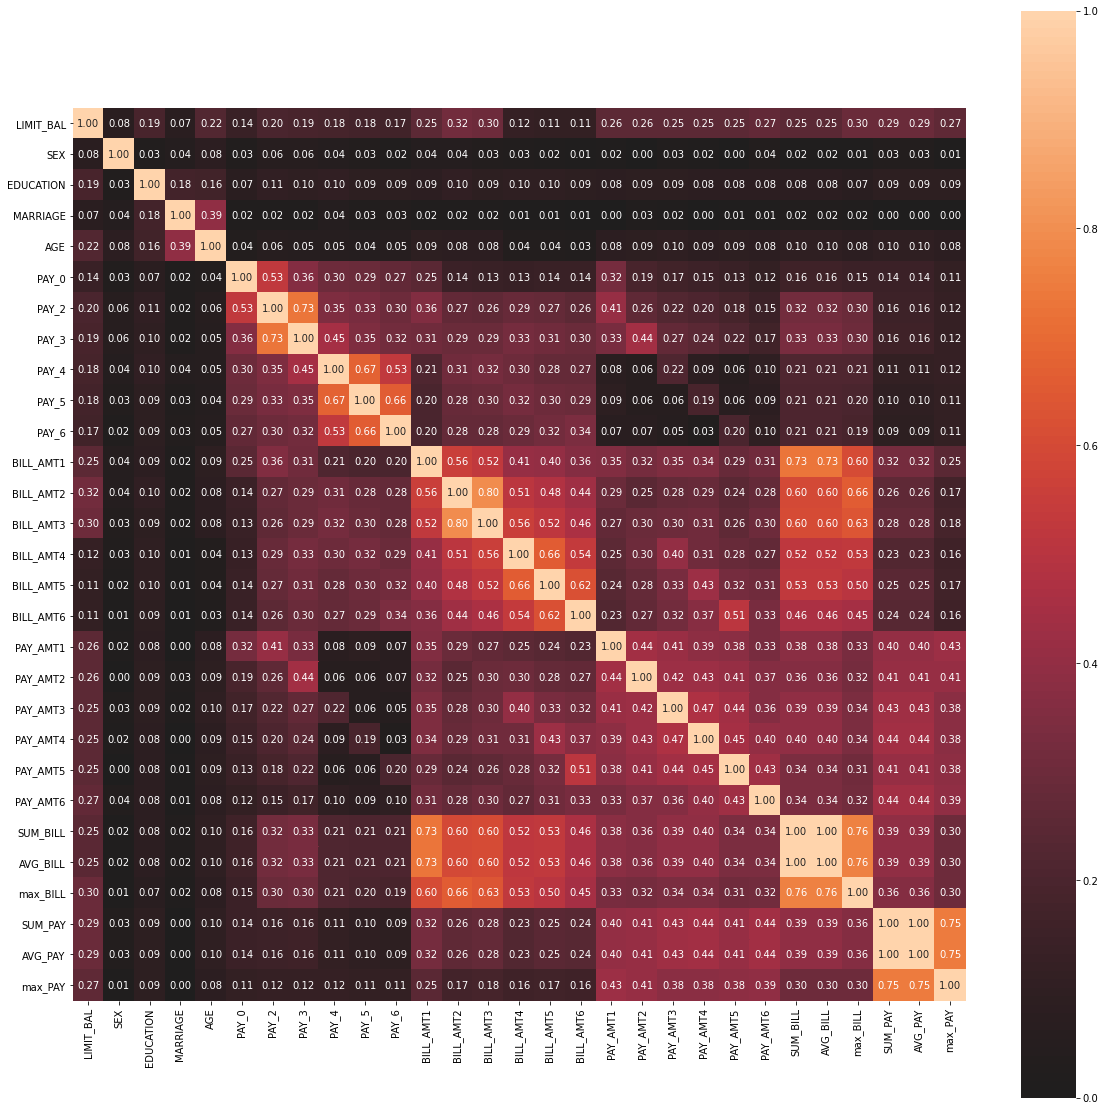

In [48]:

z = nominal.associations(X_train_transf, nominal_columns='all', figsize=(20,20) )

In [49]:
z['corr'].to_csv('/content/drive/MyDrive/Curso_Logistica/crammer.csv')

In [50]:
z['corr']

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
LIMIT_BAL,1.000000,0.075917,0.191578,0.073093,0.224278,0.136043,0.201201,0.190847,0.183573,0.178610,0.170267,0.252610,0.315697,0.301911,0.118180,0.112288,0.109911,0.255284,0.255520,0.253421,0.251871,0.250348,0.266030,0.245465,0.245465,0.295092,0.292240,0.292240,0.265002
SEX,0.075917,1.000000,0.025153,0.039810,0.082419,0.029297,0.056282,0.057706,0.040918,0.034141,0.021697,0.041267,0.041258,0.031636,0.029959,0.022261,0.011502,0.016876,0.000000,0.030840,0.018195,0.004375,0.037931,0.015017,0.015017,0.013686,0.034160,0.034160,0.013533
EDUCATION,0.191578,0.025153,1.000000,0.176557,0.164247,0.071552,0.106755,0.097965,0.103321,0.086327,0.092800,0.085720,0.103870,0.093304,0.100548,0.095207,0.093535,0.084807,0.090413,0.085980,0.084937,0.080755,0.081723,0.081859,0.081859,0.067564,0.086662,0.086662,0.088998
MARRIAGE,0.073093,0.039810,0.176557,1.000000,0.391212,0.017389,0.018562,0.019224,0.043182,0.029277,0.032298,0.019730,0.018854,0.018764,0.010646,0.013230,0.006823,0.004324,0.025962,0.018058,0.000000,0.014235,0.008113,0.024291,0.024291,0.021622,0.003344,0.003344,0.000000
AGE,0.224278,0.082419,0.164247,0.391212,1.000000,0.038931,0.055307,0.054649,0.047949,0.043784,0.050462,0.089444,0.081318,0.081943,0.038769,0.036824,0.030038,0.084936,0.091268,0.099074,0.085708,0.089913,0.080436,0.096295,0.096295,0.079217,0.099045,0.099045,0.081533
PAY_0,0.136043,0.029297,0.071552,0.017389,0.038931,1.000000,0.530430,0.361144,0.303647,0.292763,0.268872,0.247712,0.140801,0.134698,0.131131,0.136487,0.137253,0.320329,0.194697,0.168955,0.150286,0.134655,0.115859,0.161275,0.161275,0.147765,0.144263,0.144263,0.113649
PAY_2,0.201201,0.056282,0.106755,0.018562,0.055307,0.530430,1.000000,0.733348,0.350220,0.328152,0.298062,0.359336,0.268946,0.258196,0.287548,0.274131,0.257663,0.413615,0.260138,0.223046,0.204516,0.182082,0.145132,0.317583,0.317583,0.296197,0.155866,0.155866,0.120841
PAY_3,0.190847,0.057706,0.097965,0.019224,0.054649,0.361144,0.733348,1.000000,0.447632,0.349572,0.317121,0.308414,0.291361,0.290053,0.325120,0.310791,0.295530,0.329269,0.441660,0.273286,0.242835,0.216725,0.170943,0.334979,0.334979,0.302672,0.163820,0.163820,0.122461
PAY_4,0.183573,0.040918,0.103321,0.043182,0.047949,0.303647,0.350220,0.447632,1.000000,0.672618,0.530071,0.214660,0.307331,0.323559,0.298929,0.280527,0.274864,0.075896,0.058559,0.217532,0.085463,0.055629,0.095147,0.213417,0.213417,0.213627,0.110619,0.110619,0.118525
PAY_5,0.178610,0.034141,0.086327,0.029277,0.043784,0.292763,0.328152,0.349572,0.672618,1.000000,0.658311,0.197787,0.281377,0.295963,0.323142,0.302495,0.293408,0.087461,0.059661,0.057643,0.192291,0.064525,0.085851,0.206662,0.206662,0.201712,0.099730,0.099730,0.111604


# 6. Data Preparation: Feature Selection -
# Parte 2

# Modelagem

In [51]:
import statsmodels.api as sm

In [52]:
X_train_trat = X_train.copy()

In [ ]:
X_train_trat.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
10910,10911,200601,220000,2,2,1,53,0,0,0,0,0,0,207592,212099,214669,173187,176496,169649,8165.0,6889.0,6033.0,6247.0,6142.0,6146.0,1153692,192282.000000,214669,39622,6603.666667,8165
12563,12564,200602,300000,2,1,2,31,0,0,0,-1,-1,-1,11158,1616,3658,658,662,0,1000.0,2700.0,658.0,662.0,0.0,0.0,17752,2958.666667,11158,5020,836.666667,2700
369,370,200510,20000,2,2,1,32,3,2,0,0,0,0,20631,20010,19703,11084,10918,10985,0.0,1168.0,384.0,390.0,632.0,616.0,93331,15555.166667,20631,3190,531.666667,1168
7702,7703,200512,410000,1,3,2,38,-1,-1,-1,-1,-1,-1,4822,232,2255,2546,2650,6286,233.0,2266.0,2558.0,2663.0,6303.0,12.0,18791,3131.833333,6286,14035,2339.166667,6303
7464,7465,200512,100000,2,2,2,25,0,0,0,-1,-1,-1,8791,4910,0,674,0,980,1000.0,0.0,674.0,0.0,980.0,4413.0,15355,2559.166667,8791,7067,1177.833333,4413


In [53]:
X_train_trat = sm.add_constant(X_train_trat, prepend=False)

In [54]:

X_train_trat.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY,const
10910,10911,200601,220000,2,2,1,53,0,0,0,0,0,0,207592,212099,214669,173187,176496,169649,8165.0,6889.0,6033.0,6247.0,6142.0,6146.0,1153692,192282.000000,214669,39622,6603.666667,8165,1.0
12563,12564,200602,300000,2,1,2,31,0,0,0,-1,-1,-1,11158,1616,3658,658,662,0,1000.0,2700.0,658.0,662.0,0.0,0.0,17752,2958.666667,11158,5020,836.666667,2700,1.0
369,370,200510,20000,2,2,1,32,3,2,0,0,0,0,20631,20010,19703,11084,10918,10985,0.0,1168.0,384.0,390.0,632.0,616.0,93331,15555.166667,20631,3190,531.666667,1168,1.0
7702,7703,200512,410000,1,3,2,38,-1,-1,-1,-1,-1,-1,4822,232,2255,2546,2650,6286,233.0,2266.0,2558.0,2663.0,6303.0,12.0,18791,3131.833333,6286,14035,2339.166667,6303,1.0
7464,7465,200512,100000,2,2,2,25,0,0,0,-1,-1,-1,8791,4910,0,674,0,980,1000.0,0.0,674.0,0.0,980.0,4413.0,15355,2559.166667,8791,7067,1177.833333,4413,1.0


In [55]:
X_train_trat.dtypes

ID             int64
SAFRA          int64
LIMIT_BAL      int64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_0          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1      int64
BILL_AMT2      int64
BILL_AMT3      int64
BILL_AMT4      int64
BILL_AMT5      int64
BILL_AMT6      int64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
SUM_BILL       int64
AVG_BILL     float64
max_BILL       int64
SUM_PAY        int64
AVG_PAY      float64
max_PAY        int64
const        float64
dtype: object

In [56]:
variable_names = ['const','LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',\
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',\
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',\
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SUM_BILL',\
       'AVG_BILL', 'max_BILL', 'SUM_PAY', 'AVG_PAY', 'max_PAY']

In [57]:
log_reg = sm.Logit(y_train, X_train_trat[variable_names]).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: ignored

In [ ]:
#print(log_reg.summary2())

In [58]:

filter1 = ['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2',\
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',\
       'BILL_AMT5', 'PAY_AMT1',\
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SUM_BILL',\
       'AVG_BILL', 'max_BILL', 'SUM_PAY', 'AVG_PAY', 'max_PAY']

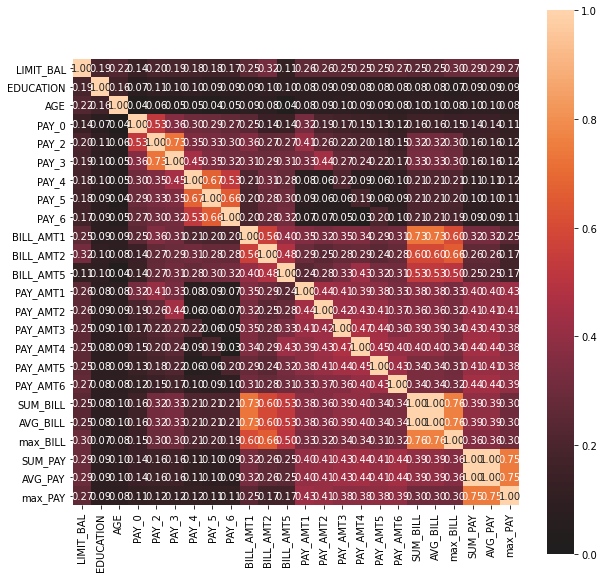

In [59]:
from dython import nominal
z = nominal.associations(X_train_transf[filter1], nominal_columns = 'all', figsize=(10,10))

# 7. Data Preparation: Feature Selection -
# Parte 3

In [60]:
z['corr'].to_csv('/content/drive/MyDrive/Curso_Logistica/crammer.csv')

In [ ]:
#print(log_reg.summary2())

In [61]:
finalistas = ['const', 'LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_5', 'BILL_AMT2', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AVG_BILL', 'AVG_PAY']

In [62]:

log_reg = sm.Logit(y_train, X_train_trat[finalistas]).fit()

Optimization terminated successfully.
         Current function value: 0.472411
         Iterations 6


In [63]:
print(log_reg.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.124     
Dependent Variable: default          AIC:              13922.8885
Date:               2021-07-18 14:17 BIC:              14052.0138
No. Observations:   14700            Log-Likelihood:   -6944.4   
Df Model:           16               LL-Null:          -7923.7   
Df Residuals:       14683            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const        -1.0007    0.0965  -10.3668  0.0000  -1.1898  -0.8115
LIMIT_BAL    -0.0000    0.0000   -0.0868  0.9308  -0.0000   0.0000
EDUCATION    -0.1057    0.0299   -3.5350  0.0004  -0.1644  -0.0471
AGE           0.0085    0.0023

In [64]:
log_reg.params

const       -1.000656e+00
LIMIT_BAL   -1.920795e-08
EDUCATION   -1.057393e-01
AGE          8.511529e-03
PAY_0        5.461602e-01
PAY_2        9.291462e-02
PAY_5        1.338838e-01
BILL_AMT2   -8.522925e-08
BILL_AMT5    4.806592e-06
PAY_AMT1    -4.027680e-05
PAY_AMT2    -3.587918e-05
PAY_AMT3    -2.663147e-05
PAY_AMT4    -1.803910e-05
PAY_AMT5    -2.004823e-05
PAY_AMT6    -2.300518e-05
AVG_BILL    -2.797047e-06
AVG_PAY      2.547157e-06
dtype: float64

# 8. Data Preparation: Feature Selection -
# Parte 4

# Refinamento do Modelo

In [ ]:
finalistas = [ 'LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_5', 'BILL_AMT2', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AVG_BILL', 'AVG_PAY']

# Avaliação do VIF

In [65]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_trat[finalistas].columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X_train_trat[finalistas].values, i)
                          for i in range(len(X_train_trat[finalistas].columns))]	
print(vif_data)

      feature        VIF
0       const  20.927789
1   LIMIT_BAL   1.601790
2   EDUCATION   1.124130
3         AGE   1.069403
4       PAY_0   1.918003
5       PAY_2   2.375655
6       PAY_5   1.833746
7   BILL_AMT2  24.771393
8   BILL_AMT5  22.687466
9    PAY_AMT1   1.976178
10   PAY_AMT2   1.752328
11   PAY_AMT3   1.711520
12   PAY_AMT4   1.872187
13   PAY_AMT5   1.664856
14   PAY_AMT6   1.634595
15   AVG_BILL  72.155823
16    AVG_PAY   2.027532


In [66]:
VIF1 = [ 'LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_5','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AVG_BILL', 'AVG_PAY']

In [67]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_trat[VIF1].columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X_train_trat[VIF1].values, i)
                          for i in range(len(X_train_trat[VIF1].columns))]	
print(vif_data)

      feature       VIF
0   LIMIT_BAL  4.021817
1   EDUCATION  5.979396
2         AGE  8.644352
3       PAY_0  1.913291
4       PAY_2  2.367716
5       PAY_5  1.849379
6    PAY_AMT1  2.865542
7    PAY_AMT2  2.740097
8    PAY_AMT3  2.709922
9    PAY_AMT4  2.589043
10   PAY_AMT5  2.556805
11   PAY_AMT6  2.442689
12   AVG_BILL  2.764310
13    AVG_PAY  2.445064


# Tratamento de variáveis categóricas

In [68]:
X_train_trat['EDUCATION'].groupby(X_train_trat['EDUCATION']).count()

EDUCATION
0       8
1    5240
2    6899
3    2362
4      55
5     114
6      22
Name: EDUCATION, dtype: int64

**Sugestão do paper: Education(1=graduate school; 2 = university; 3 = high school; 4= others).**

In [69]:


X_train_trat.loc[X_train_trat['EDUCATION'] == 1, 'EDUCATION_trat1'] = '1_GS'

X_train_trat.loc[X_train_trat['EDUCATION'] == 2, 'EDUCATION_trat1'] = '2_UN'

X_train_trat.loc[X_train_trat['EDUCATION'] == 3, 'EDUCATION_trat1'] = '3_HS'

X_train_trat.loc[X_train_trat['EDUCATION'] == 0, 'EDUCATION_trat1'] = '4_OT'

X_train_trat.loc[X_train_trat['EDUCATION'] > 3, 'EDUCATION_trat1'] = '4_OT'


In [70]:
X_train_trat.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY,const,EDUCATION_trat1
10910,10911,200601,220000,2,2,1,53,0,0,0,0,0,0,207592,212099,214669,173187,176496,169649,8165.0,6889.0,6033.0,6247.0,6142.0,6146.0,1153692,192282.000000,214669,39622,6603.666667,8165,1.0,2_UN
12563,12564,200602,300000,2,1,2,31,0,0,0,-1,-1,-1,11158,1616,3658,658,662,0,1000.0,2700.0,658.0,662.0,0.0,0.0,17752,2958.666667,11158,5020,836.666667,2700,1.0,1_GS
369,370,200510,20000,2,2,1,32,3,2,0,0,0,0,20631,20010,19703,11084,10918,10985,0.0,1168.0,384.0,390.0,632.0,616.0,93331,15555.166667,20631,3190,531.666667,1168,1.0,2_UN
7702,7703,200512,410000,1,3,2,38,-1,-1,-1,-1,-1,-1,4822,232,2255,2546,2650,6286,233.0,2266.0,2558.0,2663.0,6303.0,12.0,18791,3131.833333,6286,14035,2339.166667,6303,1.0,3_HS
7464,7465,200512,100000,2,2,2,25,0,0,0,-1,-1,-1,8791,4910,0,674,0,980,1000.0,0.0,674.0,0.0,980.0,4413.0,15355,2559.166667,8791,7067,1177.833333,4413,1.0,2_UN


In [71]:
X_train_trat['EDUCATION_trat1'].groupby(X_train_trat['EDUCATION_trat1']).count()

EDUCATION_trat1
1_GS    5240
2_UN    6899
3_HS    2362
4_OT     199
Name: EDUCATION_trat1, dtype: int64

In [72]:

# Constrastes: https://www.statsmodels.org/stable/examples/notebooks/generated/contrasts.html
from patsy.contrasts import Treatment

In [73]:
levels = [1,2,3,4]
contrast = Treatment(reference=0).code_without_intercept(levels)
print(contrast.matrix)

[[0. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [74]:
import statsmodels.formula.api as smf
log_reg = smf.logit(formula = 'y_train ~ C(EDUCATION_trat1, Treatment(reference=3)) + \
                            LIMIT_BAL + AGE + PAY_0 + PAY_2 + PAY_5 + \
                            PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + AVG_BILL + AVG_PAY \
                            ', data=X_train_trat).fit()

Optimization terminated successfully.
         Current function value: 0.471899
         Iterations 7


In [75]:
print(log_reg.summary2())

                                          Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.125     
Dependent Variable:            y_train                     AIC:                         13907.8207
Date:                          2021-07-18 14:18            BIC:                         14036.9459
No. Observations:              14700                       Log-Likelihood:              -6936.9   
Df Model:                      16                          LL-Null:                     -7923.7   
Df Residuals:                  14683                       LLR p-value:                 0.0000    
Converged:                     1.0000                      Scale:                       1.0000    
No. Iterations:                7.0000                                                             
--------------------------------------------------------------------------------------------------
                                                    

In [76]:
log_reg = smf.logit(formula = 'y_train ~ C(EDUCATION_trat1, Treatment(reference=3)) + \
  AGE + PAY_0 + PAY_2 + PAY_5 + \
  PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + AVG_BILL + AVG_PAY \
  ', data=X_train_trat).fit()

Optimization terminated successfully.
         Current function value: 0.471900
         Iterations 7


In [77]:

print(log_reg.summary2())

                                          Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.125     
Dependent Variable:            y_train                     AIC:                         13905.8609
Date:                          2021-07-18 14:18            BIC:                         14027.3905
No. Observations:              14700                       Log-Likelihood:              -6936.9   
Df Model:                      15                          LL-Null:                     -7923.7   
Df Residuals:                  14684                       LLR p-value:                 0.0000    
Converged:                     1.0000                      Scale:                       1.0000    
No. Iterations:                7.0000                                                             
--------------------------------------------------------------------------------------------------
                                                    

In [78]:
log_reg = smf.logit(formula = 'y_train ~ C(EDUCATION_trat1, Treatment(reference=3)) + \
  AGE + PAY_0 + PAY_2 + PAY_5 + \
  PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + AVG_BILL \
  ', data=X_train_trat).fit()


print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.471937
         Iterations 7
                                          Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.124     
Dependent Variable:            y_train                     AIC:                         13904.9389
Date:                          2021-07-18 14:18            BIC:                         14018.8729
No. Observations:              14700                       Log-Likelihood:              -6937.5   
Df Model:                      14                          LL-Null:                     -7923.7   
Df Residuals:                  14685                       LLR p-value:                 0.0000    
Converged:                     1.0000                      Scale:                       1.0000    
No. Iterations:                7.0000                                                             
-------------------------------------------------

In [79]:
log_reg = smf.logit(formula = 'y_train ~ C(EDUCATION_trat1, Treatment(reference=3)) + \
  AGE + PAY_0 + PAY_2 + PAY_5 + \
  PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT5 + PAY_AMT6 + AVG_BILL \
  ', data=X_train_trat).fit()


print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.471982
         Iterations 7
                                          Results: Logit
Model:                         Logit                       Pseudo R-squared:            0.124     
Dependent Variable:            y_train                     AIC:                         13904.2755
Date:                          2021-07-18 14:18            BIC:                         14010.6139
No. Observations:              14700                       Log-Likelihood:              -6938.1   
Df Model:                      13                          LL-Null:                     -7923.7   
Df Residuals:                  14686                       LLR p-value:                 0.0000    
Converged:                     1.0000                      Scale:                       1.0000    
No. Iterations:                7.0000                                                             
-------------------------------------------------

In [80]:
log_reg.params

Intercept                                            -2.722997
C(EDUCATION_trat1, Treatment(reference=3))[T.1_GS]    1.630109
C(EDUCATION_trat1, Treatment(reference=3))[T.2_UN]    1.517372
C(EDUCATION_trat1, Treatment(reference=3))[T.3_HS]    1.537183
AGE                                                   0.007292
PAY_0                                                 0.549532
PAY_2                                                 0.079960
PAY_5                                                 0.146847
PAY_AMT1                                             -0.000044
PAY_AMT2                                             -0.000037
PAY_AMT3                                             -0.000024
PAY_AMT5                                             -0.000022
PAY_AMT6                                             -0.000022
AVG_BILL                                              0.000001
dtype: float64

# 9. Ajuste do modelo

In [81]:
binning_process

BinningProcess(binning_fit_params=None, binning_transform_params=None,
               categorical_variables=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                                      'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                      'PAY_6'],
               max_bin_size=None, max_n_bins=3, max_n_prebins=20,
               max_pvalue=None, max_pvalue_policy='consecutive',
               min_bin_size=None, min_n_bins=None, min_prebin_size=0.1,
               n_jobs=None, selection_criteria...None,
               split_digits=None,
               variable_names=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
                               'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                               'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                               'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                               'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                               'PAY_AMT4', 'PAY_AMT5', 'PAY_A

In [82]:

X_train_transf = binning_process.transform(X_train_trat, metric='bins')


In [83]:
X_train_transf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
0,"[125000.00, inf)",[2],[2],[1 3],"[41.50, inf)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[ 0 -2 6],[ 0 -2],[ 0 -2],"[65968.50, inf)","[35166.00, inf)","[32102.00, inf)","[8438.00, inf)","[8150.50, inf)","[5865.00, inf)","[4902.50, inf)","[4966.50, inf)","[2918.50, inf)","[2851.50, inf)","[3997.50, inf)","[3781.00, inf)","[290629.00, inf)","[48438.17, inf)","[35558.00, inf)","[13302.50, 60701.50)","[2217.08, 10116.92)","[4873.50, 24396.00)"
1,"[125000.00, inf)",[2],[0 4 6 5 1],[0 2],"[25.50, 41.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[-inf, 2509.00)","[-inf, 1326.50)","[-inf, 399.50)","[21.50, 4902.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[-inf, 0.50)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"
2,"[-inf, 45000.00)",[2],[2],[1 3],"[25.50, 41.50)",[6 5 8 4 2 3 7],[4 2 7 3 5 6],[-1 0],[ 0 -2 6],[ 0 -2],[ 0 -2],"[781.50, 65968.50)","[11880.50, 35166.00)","[12238.00, 32102.00)","[8438.00, inf)","[8150.50, inf)","[5865.00, inf)","[-inf, 21.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[0.50, 3997.50)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"
3,"[125000.00, inf)",[1],[3],[0 2],"[25.50, 41.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[2509.00, 8438.00)","[1326.50, 8150.50)","[5865.00, inf)","[21.50, 4902.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[3997.50, inf)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[13302.50, 60701.50)","[2217.08, 10116.92)","[4873.50, 24396.00)"
4,"[45000.00, 125000.00)",[2],[2],[0 2],"[-inf, 25.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[-inf, 2509.00)","[-inf, 1326.50)","[399.50, 5865.00)","[21.50, 4902.50)","[-inf, 91.00)","[1.50, 2918.50)","[-inf, 11.50)","[0.50, 3997.50)","[3781.00, inf)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"


In [84]:
y= y_train.reset_index()



In [85]:
y.head()

,index,default
0,10910,1
1,12563,0
2,369,1
3,7702,0
4,7464,0


In [86]:
import statsmodels.formula.api as smf
log_reg = smf.logit(formula = " y['default'] ~ C(EDUCATION, Treatment(reference=1)) + \
C(LIMIT_BAL, Treatment(reference=0)) + \
C(AGE, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_2, Treatment(reference=0)) + \
C(PAY_5, Treatment(reference=0)) + \
C(PAY_AMT1, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(PAY_AMT4, Treatment(reference=0)) + \
C(PAY_AMT5, Treatment(reference=0)) + \
C(PAY_AMT6, Treatment(reference=0)) + \
C(AVG_BILL, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

Optimization terminated successfully.
         Current function value: 0.446199
         Iterations 6


In [87]:
print(log_reg.summary2())

                                               Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.172     
Dependent Variable:                 y['default']                   AIC:                            13176.2517
Date:                               2021-07-18 14:19               BIC:                            13396.5241
No. Observations:                   14700                          Log-Likelihood:                 -6559.1   
Df Model:                           28                             LL-Null:                        -7923.7   
Df Residuals:                       14671                          LLR p-value:                    0.0000    
Converged:                          1.0000                         Scale:                          1.0000    
No. Iterations:                     6.0000                                                                   
----------------------------------------------------------

In [88]:
# remover EDUCATION


log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(AGE, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_2, Treatment(reference=0)) + \
C(PAY_5, Treatment(reference=0)) + \
C(PAY_AMT1, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(PAY_AMT4, Treatment(reference=0)) + \
C(PAY_AMT5, Treatment(reference=0)) + \
C(PAY_AMT6, Treatment(reference=0)) + \
C(AVG_BILL, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()


Optimization terminated successfully.
         Current function value: 0.446203
         Iterations 6


In [ ]:

print(log_reg.summary2())

                                               Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.172     
Dependent Variable:                 y['default']                   AIC:                            13172.3706
Date:                               2021-07-14 11:29               BIC:                            13377.4519
No. Observations:                   14700                          Log-Likelihood:                 -6559.2   
Df Model:                           26                             LL-Null:                        -7923.7   
Df Residuals:                       14673                          LLR p-value:                    0.0000    
Converged:                          1.0000                         Scale:                          1.0000    
No. Iterations:                     6.0000                                                                   
----------------------------------------------------------

In [ ]:
# remover PAY_AMT4 e PAY_AMT5


log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(AGE, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_2, Treatment(reference=0)) + \
C(PAY_5, Treatment(reference=0)) + \
C(PAY_AMT1, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(PAY_AMT6, Treatment(reference=0)) + \
C(AVG_BILL, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()



Optimization terminated successfully.
         Current function value: 0.446255
         Iterations 6


In [ ]:
print(log_reg.summary2())

                                               Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.172     
Dependent Variable:                 y['default']                   AIC:                            13165.9087
Date:                               2021-07-13 14:16               BIC:                            13340.6075
No. Observations:                   14700                          Log-Likelihood:                 -6560.0   
Df Model:                           22                             LL-Null:                        -7923.7   
Df Residuals:                       14677                          LLR p-value:                    0.0000    
Converged:                          1.0000                         Scale:                          1.0000    
No. Iterations:                     6.0000                                                                   
----------------------------------------------------------

In [ ]:
# remover AGE


log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_2, Treatment(reference=0)) + \
C(PAY_5, Treatment(reference=0)) + \
C(PAY_AMT1, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(PAY_AMT6, Treatment(reference=0)) + \
C(AVG_BILL, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.446496
         Iterations 6
                                               Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.172     
Dependent Variable:                 y['default']                   AIC:                            13168.9901
Date:                               2021-07-13 14:16               BIC:                            13328.4977
No. Observations:                   14700                          Log-Likelihood:                 -6563.5   
Df Model:                           20                             LL-Null:                        -7923.7   
Df Residuals:                       14679                          LLR p-value:                    0.0000    
Converged:                          1.0000                         Scale:                          1.0000    
No. Iterations:                     6.0000                        

In [ ]:
# remover PAY_5


log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_2, Treatment(reference=0)) + \
C(PAY_AMT1, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(PAY_AMT6, Treatment(reference=0)) + \
C(AVG_BILL, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.449178
         Iterations 6
                                               Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.167     
Dependent Variable:                 y['default']                   AIC:                            13243.8421
Date:                               2021-07-13 14:16               BIC:                            13388.1586
No. Observations:                   14700                          Log-Likelihood:                 -6602.9   
Df Model:                           18                             LL-Null:                        -7923.7   
Df Residuals:                       14681                          LLR p-value:                    0.0000    
Converged:                          1.0000                         Scale:                          1.0000    
No. Iterations:                     6.0000                        

In [ ]:
# remover PAY_AMT1


log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_2, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(PAY_AMT6, Treatment(reference=0)) + \
C(AVG_BILL, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

print(log_reg.summary2())


Optimization terminated successfully.
         Current function value: 0.449507
         Iterations 6
                                               Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.166     
Dependent Variable:                 y['default']                   AIC:                            13249.5155
Date:                               2021-07-13 14:16               BIC:                            13378.6408
No. Observations:                   14700                          Log-Likelihood:                 -6607.8   
Df Model:                           16                             LL-Null:                        -7923.7   
Df Residuals:                       14683                          LLR p-value:                    0.0000    
Converged:                          1.0000                         Scale:                          1.0000    
No. Iterations:                     6.0000                        

In [ ]:
# remover AVG_BILL


log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_2, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(PAY_AMT6, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.450201
         Iterations 6
                                                Results: Logit
Model:                             Logit                           Pseudo R-squared:                0.165     
Dependent Variable:                y['default']                    AIC:                             13265.8953
Date:                              2021-07-13 14:16                BIC:                             13379.8293
No. Observations:                  14700                           Log-Likelihood:                  -6617.9   
Df Model:                          14                              LL-Null:                         -7923.7   
Df Residuals:                      14685                           LLR p-value:                     0.0000    
Converged:                         1.0000                          Scale:                           1.0000    
No. Iterations:                    6.0000                 

In [ ]:
# remover PAY_2


log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(PAY_AMT6, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.452826
         Iterations 6
                                                Results: Logit
Model:                             Logit                           Pseudo R-squared:                0.160     
Dependent Variable:                y['default']                    AIC:                             13339.0919
Date:                              2021-07-13 14:16                BIC:                             13437.8347
No. Observations:                  14700                           Log-Likelihood:                  -6656.5   
Df Model:                          12                              LL-Null:                         -7923.7   
Df Residuals:                      14687                           LLR p-value:                     0.0000    
Converged:                         1.0000                          Scale:                           1.0000    
No. Iterations:                    6.0000                 

In [ ]:
# remover PAY_AMT6


log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.453053
         Iterations 6
                                                Results: Logit
Model:                             Logit                           Pseudo R-squared:                0.160     
Dependent Variable:                y['default']                    AIC:                             13341.7591
Date:                              2021-07-13 14:16                BIC:                             13425.3108
No. Observations:                  14700                           Log-Likelihood:                  -6659.9   
Df Model:                          10                              LL-Null:                         -7923.7   
Df Residuals:                      14689                           LLR p-value:                     0.0000    
Converged:                         1.0000                          Scale:                           1.0000    
No. Iterations:                    6.0000                 

In [89]:

# Colocar uma variavel outrora eliminada para verificar se ela fica significada outra vez - PAY_AMT1

log_reg = smf.logit(formula = " y['default'] ~ C(PAY_AMT1, Treatment(reference=0)) + \
C(LIMIT_BAL, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.452403
         Iterations 6
                                               Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.161     
Dependent Variable:                 y['default']                   AIC:                            13326.6483
Date:                               2021-07-18 14:19               BIC:                            13425.3911
No. Observations:                   14700                          Log-Likelihood:                 -6650.3   
Df Model:                           12                             LL-Null:                        -7923.7   
Df Residuals:                       14687                          LLR p-value:                    0.0000    
Converged:                          1.0000                         Scale:                          1.0000    
No. Iterations:                     6.0000                        

# 10. Revisão do processo

In [90]:
import pandas as pd


In [91]:

dados = pd.read_csv('/content/drive/MyDrive/Curso_Logistica/dataset_trat.csv', sep = ';')
dados.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,200510,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,200510,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,200510,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,200510,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,200510,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Transformações 2

In [92]:

dados['AVG_PAY'] = (dados['PAY_AMT1'] + dados['PAY_AMT2'] + dados['PAY_AMT3'] + dados['PAY_AMT4']+ dados['PAY_AMT5']+ dados['PAY_AMT6'])/6

dados.loc[dados['PAY_AMT2'] > 18987.5 , 'PAY_AMT2'] = 18987.5 
dados.loc[dados['PAY_AMT3'] > 15500.7 , 'PAY_AMT3'] = 15500.7 

# Manter apenas as variáveis finais no conjunto de dados

In [93]:

dados=dados[['ID', 'SAFRA', 'LIMIT_BAL', 'PAY_0', 'AVG_PAY', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'default']]
dados.head()

,ID,SAFRA,LIMIT_BAL,PAY_0,AVG_PAY,PAY_AMT1,PAY_AMT2,PAY_AMT3,default
0,1,200510,20000,2,114.833333,0,689.0,0.0,1
1,2,200510,120000,-1,833.333333,0,1000.0,1000.0,1
2,3,200510,90000,0,1836.333333,1518,1500.0,1000.0,0
3,4,200510,50000,0,1398.000000,2000,2019.0,1200.0,0
4,5,200510,50000,-1,9841.500000,2000,18987.5,10000.0,0


# Transformações Finais

In [94]:
dados.loc[dados['LIMIT_BAL'] < 45000.00, 'LIMIT_BAL_trat'] = 'C0'
dados.loc[(dados['LIMIT_BAL'] >= 45000.00) & (dados['LIMIT_BAL'] < 125000.00), 'LIMIT_BAL_trat'] = 'C1'
dados.loc[dados['LIMIT_BAL'] >= 125000.00, 'LIMIT_BAL_trat'] = 'C2'

In [95]:
dados['LIMIT_BAL_trat'].value_counts()

C2    16188
C1     9501
C0     4311
Name: LIMIT_BAL_trat, dtype: int64

In [96]:
dados.loc[dados['PAY_AMT1'] < 21.50, 'PAY_AMT1_trat'] = 'C0'
dados.loc[(dados['PAY_AMT1'] >= 21.50) & (dados['PAY_AMT1'] < 4902.50), 'PAY_AMT1_trat'] = 'C1'
dados.loc[dados['PAY_AMT1'] >= 4902.50, 'PAY_AMT1_trat'] = 'C2'

In [97]:
dados['PAY_AMT1_trat'].value_counts()

C1    16255
C2     8334
C0     5411
Name: PAY_AMT1_trat, dtype: int64

In [98]:
dados.loc[dados['PAY_AMT2'] < 91.00, 'PAY_AMT2_trat'] = 'C0'
dados.loc[(dados['PAY_AMT2'] >= 91.00) & (dados['PAY_AMT2'] < 4966.50), 'PAY_AMT2_trat'] = 'C1'
dados.loc[dados['PAY_AMT2'] >= 4966.50, 'PAY_AMT2_trat'] = 'C2'

In [99]:
dados['PAY_AMT2_trat'].value_counts()

C1    16351
C2     7984
C0     5665
Name: PAY_AMT2_trat, dtype: int64

In [100]:
dados.loc[dados['PAY_AMT3'] < 1.50, 'PAY_AMT3_trat'] = 'C0'
dados.loc[(dados['PAY_AMT3'] >= 1.50) & (dados['PAY_AMT3'] < 2918.50), 'PAY_AMT3_trat'] = 'C1'
dados.loc[dados['PAY_AMT3'] >= 2918.50, 'PAY_AMT3_trat'] = 'C2'



In [101]:
dados['PAY_AMT3_trat'].value_counts()

C1    12937
C2    11082
C0     5981
Name: PAY_AMT3_trat, dtype: int64

In [102]:

dados.loc[dados['AVG_PAY'] < 2217.08, 'AVG_PAY_trat'] = 'C0'
dados.loc[(dados['AVG_PAY'] >= 2217.08) & (dados['AVG_PAY'] < 10116.92), 'AVG_PAY_trat'] = 'C1'
dados.loc[dados['AVG_PAY'] >= 10116.92, 'AVG_PAY_trat'] = 'C2'



In [103]:
dados['AVG_PAY_trat'].value_counts()

C0    14316
C1    11982
C2     3702
Name: AVG_PAY_trat, dtype: int64

In [104]:
dados['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [105]:

dados.loc[dados['PAY_0'] < 1, 'PAY_0_trat'] = 'C0'
dados.loc[dados['PAY_0'] == 1, 'PAY_0_trat'] = 'C1'
dados.loc[dados['PAY_0'] > 1, 'PAY_0_trat'] = 'C2'



In [106]:
dados['PAY_0_trat'].value_counts()

C0    23182
C1     3688
C2     3130
Name: PAY_0_trat, dtype: int64

In [107]:
dados.head()

,ID,SAFRA,LIMIT_BAL,PAY_0,AVG_PAY,PAY_AMT1,PAY_AMT2,PAY_AMT3,default,LIMIT_BAL_trat,PAY_AMT1_trat,PAY_AMT2_trat,PAY_AMT3_trat,AVG_PAY_trat,PAY_0_trat
0,1,200510,20000,2,114.833333,0,689.0,0.0,1,C0,C0,C1,C0,C0,C2
1,2,200510,120000,-1,833.333333,0,1000.0,1000.0,1,C1,C0,C1,C1,C0,C0
2,3,200510,90000,0,1836.333333,1518,1500.0,1000.0,0,C1,C1,C1,C1,C0,C0
3,4,200510,50000,0,1398.000000,2000,2019.0,1200.0,0,C1,C1,C1,C1,C0,C0
4,5,200510,50000,-1,9841.500000,2000,18987.5,10000.0,0,C1,C1,C2,C2,C1,C0


In [108]:
dados=dados[['ID', 'SAFRA', 'default', 'LIMIT_BAL_trat', 'PAY_AMT1_trat', 'PAY_AMT2_trat', 'PAY_AMT3_trat', 'AVG_PAY_trat', 'PAY_0_trat']]

In [109]:
dados.head()


,ID,SAFRA,default,LIMIT_BAL_trat,PAY_AMT1_trat,PAY_AMT2_trat,PAY_AMT3_trat,AVG_PAY_trat,PAY_0_trat
0,1,200510,1,C0,C0,C1,C0,C0,C2
1,2,200510,1,C1,C0,C1,C1,C0,C0
2,3,200510,0,C1,C1,C1,C1,C0,C0
3,4,200510,0,C1,C1,C1,C1,C0,C0
4,5,200510,0,C1,C1,C2,C2,C1,C0


# Divisão do conjunto de dados 2

In [110]:
OOT = dados.loc[dados['SAFRA'] >= 200605]
OOT['SAFRA'].groupby(OOT['SAFRA']).count()

SAFRA
200605    3000
200606    3000
200607    3000
Name: SAFRA, dtype: int64

In [111]:
DEV = dados.loc[dados['SAFRA'] <  200605]
DEV['SAFRA'].groupby(DEV['SAFRA']).count()

SAFRA
200510    3000
200511    3000
200512    3000
200601    3000
200602    3000
200603    3000
200604    3000
Name: SAFRA, dtype: int64

In [112]:

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(DEV ,test_size=0.3, random_state=123)



In [113]:
X_train.head()

,ID,SAFRA,default,LIMIT_BAL_trat,PAY_AMT1_trat,PAY_AMT2_trat,PAY_AMT3_trat,AVG_PAY_trat,PAY_0_trat
10910,10911,200601,1,C2,C2,C2,C2,C1,C0
12563,12564,200602,0,C2,C1,C1,C1,C0,C0
369,370,200510,1,C0,C0,C1,C1,C0,C2
7702,7703,200512,0,C2,C1,C1,C1,C1,C0
7464,7465,200512,0,C1,C1,C0,C1,C0,C0


In [114]:

X_train.to_csv('/content/drive/MyDrive/Curso_Logistica/X_train_cat.csv',index=None)
X_test.to_csv('/content/drive/MyDrive/Curso_Logistica/X_test_cat.csv',index=None)

# 11. Diagnóstico das features finais

# 12. Modelo Final

**Reajustar modelo, devido a inversão na variável PAY_AMT3**

In [115]:
binning_process

BinningProcess(binning_fit_params=None, binning_transform_params=None,
               categorical_variables=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0',
                                      'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                      'PAY_6'],
               max_bin_size=None, max_n_bins=3, max_n_prebins=20,
               max_pvalue=None, max_pvalue_policy='consecutive',
               min_bin_size=None, min_n_bins=None, min_prebin_size=0.1,
               n_jobs=None, selection_criteria...None,
               split_digits=None,
               variable_names=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',
                               'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                               'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
                               'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                               'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
                               'PAY_AMT4', 'PAY_AMT5', 'PAY_A

In [116]:
X_train_transf = binning_process.transform(X_train_trat, metric='bins')

In [117]:
X_train_transf.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SUM_BILL,AVG_BILL,max_BILL,SUM_PAY,AVG_PAY,max_PAY
0,"[125000.00, inf)",[2],[2],[1 3],"[41.50, inf)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[ 0 -2 6],[ 0 -2],[ 0 -2],"[65968.50, inf)","[35166.00, inf)","[32102.00, inf)","[8438.00, inf)","[8150.50, inf)","[5865.00, inf)","[4902.50, inf)","[4966.50, inf)","[2918.50, inf)","[2851.50, inf)","[3997.50, inf)","[3781.00, inf)","[290629.00, inf)","[48438.17, inf)","[35558.00, inf)","[13302.50, 60701.50)","[2217.08, 10116.92)","[4873.50, 24396.00)"
1,"[125000.00, inf)",[2],[0 4 6 5 1],[0 2],"[25.50, 41.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[-inf, 2509.00)","[-inf, 1326.50)","[-inf, 399.50)","[21.50, 4902.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[-inf, 0.50)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"
2,"[-inf, 45000.00)",[2],[2],[1 3],"[25.50, 41.50)",[6 5 8 4 2 3 7],[4 2 7 3 5 6],[-1 0],[ 0 -2 6],[ 0 -2],[ 0 -2],"[781.50, 65968.50)","[11880.50, 35166.00)","[12238.00, 32102.00)","[8438.00, inf)","[8150.50, inf)","[5865.00, inf)","[-inf, 21.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[0.50, 3997.50)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"
3,"[125000.00, inf)",[1],[3],[0 2],"[25.50, 41.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[2509.00, 8438.00)","[1326.50, 8150.50)","[5865.00, inf)","[21.50, 4902.50)","[91.00, 4966.50)","[1.50, 2918.50)","[11.50, 2851.50)","[3997.50, inf)","[-inf, 941.50)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[13302.50, 60701.50)","[2217.08, 10116.92)","[4873.50, 24396.00)"
4,"[45000.00, 125000.00)",[2],[2],[0 2],"[-inf, 25.50)",[ 0 -2 -1],[ 8 0 1 -1],[-1 0],[-1],[-1],[-1],"[781.50, 65968.50)","[-inf, 11880.50)","[-inf, 12238.00)","[-inf, 2509.00)","[-inf, 1326.50)","[399.50, 5865.00)","[21.50, 4902.50)","[-inf, 91.00)","[1.50, 2918.50)","[-inf, 11.50)","[0.50, 3997.50)","[3781.00, inf)","[8633.00, 290629.00)","[1438.83, 48438.17)","[2984.50, 35558.00)","[-inf, 13302.50)","[-inf, 2217.08)","[-inf, 4873.50)"


In [118]:
y= y_train.reset_index()

In [119]:
y.head()


,index,default
0,10910,1
1,12563,0
2,369,1
3,7702,0
4,7464,0


In [120]:
import statsmodels.formula.api as smf

In [121]:


log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_AMT1, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(PAY_AMT3, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.452403
         Iterations 6
                                               Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.161     
Dependent Variable:                 y['default']                   AIC:                            13326.6483
Date:                               2021-07-18 14:24               BIC:                            13425.3911
No. Observations:                   14700                          Log-Likelihood:                 -6650.3   
Df Model:                           12                             LL-Null:                        -7923.7   
Df Residuals:                       14687                          LLR p-value:                    0.0000    
Converged:                          1.0000                         Scale:                          1.0000    
No. Iterations:                     6.0000                        

In [122]:

# REMOVER AMT3

log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_AMT1, Treatment(reference=0)) + \
C(PAY_AMT2, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

print(log_reg.summary2())

Optimization terminated successfully.
         Current function value: 0.452928
         Iterations 6
                                                Results: Logit
Model:                             Logit                           Pseudo R-squared:                0.160     
Dependent Variable:                y['default']                    AIC:                             13338.0823
Date:                              2021-07-18 14:24                BIC:                             13421.6340
No. Observations:                  14700                           Log-Likelihood:                  -6658.0   
Df Model:                          10                              LL-Null:                         -7923.7   
Df Residuals:                      14689                           LLR p-value:                     0.0000    
Converged:                         1.0000                          Scale:                           1.0000    
No. Iterations:                    6.0000                 

In [123]:
# REMOVER AMT2

log_reg = smf.logit(formula = " y['default'] ~ C(LIMIT_BAL, Treatment(reference=0)) + \
C(PAY_0, Treatment(reference=0)) + \
C(PAY_AMT1, Treatment(reference=0)) + \
C(AVG_PAY, Treatment(reference=0))  \
", data=X_train_transf).fit()

print(log_reg.summary2())


Optimization terminated successfully.
         Current function value: 0.453352
         Iterations 6
                                                Results: Logit
Model:                             Logit                           Pseudo R-squared:                0.159     
Dependent Variable:                y['default']                    AIC:                             13346.5452
Date:                              2021-07-18 14:24                BIC:                             13414.9056
No. Observations:                  14700                           Log-Likelihood:                  -6664.3   
Df Model:                          8                               LL-Null:                         -7923.7   
Df Residuals:                      14691                           LLR p-value:                     0.0000    
Converged:                         1.0000                          Scale:                           1.0000    
No. Iterations:                    6.0000                 

# 13. Cálculo do Score

# Manter apenas as variáveis finais no conjunto de dados

In [124]:

import pandas as pd
dados = pd.read_csv('/content/drive/MyDrive/Curso_Logistica/dataset_trat.csv', sep=';')

In [125]:
dados.head()

,ID,SAFRA,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,200510,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,200510,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,200510,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,200510,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,200510,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Transformações 3

In [126]:

dados['AVG_PAY'] = (dados['PAY_AMT1'] + dados['PAY_AMT2'] + dados['PAY_AMT3'] + dados['PAY_AMT4']+ dados['PAY_AMT5']+ dados['PAY_AMT6'])/6
dados['AVG_PAY'] = (dados['PAY_AMT1'] + dados['PAY_AMT2'] + dados['PAY_AMT3'] + dados['PAY_AMT4']+ dados['PAY_AMT5']+ dados['PAY_AMT6'])/6

dados.loc[dados['PAY_AMT1'] > 18006.25 , 'PAY_AMT1'] = 18006.25


# Manter apenas as variáveis finais no conjunto de dados


In [127]:
dados=dados[['ID', 'SAFRA', 'LIMIT_BAL', 'PAY_0', 'AVG_PAY', 'PAY_AMT1','default']]
dados.head()



,ID,SAFRA,LIMIT_BAL,PAY_0,AVG_PAY,PAY_AMT1,default
0,1,200510,20000,2,114.833333,0.0,1
1,2,200510,120000,-1,833.333333,0.0,1
2,3,200510,90000,0,1836.333333,1518.0,0
3,4,200510,50000,0,1398.000000,2000.0,0
4,5,200510,50000,-1,9841.500000,2000.0,0



# Transformações finais para cálculos do Score

In [128]:
dados.loc[dados['LIMIT_BAL'] < 45000.00, 'LIMIT_BAL_trat'] = 0
dados.loc[(dados['LIMIT_BAL'] >= 45000.00) & (dados['LIMIT_BAL'] < 125000.00), 'LIMIT_BAL_trat'] = -0.2507
dados.loc[dados['LIMIT_BAL'] >= 125000.00, 'LIMIT_BAL_trat'] = -0.3884



In [129]:
dados['LIMIT_BAL_trat'].value_counts()

-0.3884    16188
-0.2507     9501
 0.0000     4311
Name: LIMIT_BAL_trat, dtype: int64

In [130]:
dados.loc[dados['PAY_AMT1'] < 21.50, 'PAY_AMT1_trat'] = 0
dados.loc[(dados['PAY_AMT1'] >= 21.50) & (dados['PAY_AMT1'] < 4902.50), 'PAY_AMT1_trat'] = -0.2906
dados.loc[dados['PAY_AMT1'] >= 4902.50, 'PAY_AMT1_trat'] = -0.4409




In [131]:
dados['PAY_AMT1_trat'].value_counts()

-0.2906    16255
-0.4409     8334
 0.0000     5411
Name: PAY_AMT1_trat, dtype: int64

In [132]:
dados.loc[dados['AVG_PAY'] < 2217.08, 'AVG_PAY_trat'] = 0
dados.loc[(dados['AVG_PAY'] >= 2217.08) & (dados['AVG_PAY'] < 10116.92), 'AVG_PAY_trat'] = -0.3201
dados.loc[dados['AVG_PAY'] >= 10116.92, 'AVG_PAY_trat'] = -0.7438



In [133]:
dados['AVG_PAY_trat'].value_counts()

 0.0000    14316
-0.3201    11982
-0.7438     3702
Name: AVG_PAY_trat, dtype: int64

In [134]:
dados['PAY_0'].value_counts()


 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [135]:
dados.loc[dados['PAY_0'] < 1, 'PAY_0_trat'] = 0
dados.loc[dados['PAY_0'] == 1, 'PAY_0_trat'] = 0.8618
dados.loc[dados['PAY_0'] > 1, 'PAY_0_trat'] = 2.4296



In [136]:
dados['PAY_0_trat'].value_counts()

0.0000    23182
0.8618     3688
2.4296     3130
Name: PAY_0_trat, dtype: int64

In [137]:
dados['Intercept'] = -0.9964



In [138]:
dados.head()

,ID,SAFRA,LIMIT_BAL,PAY_0,AVG_PAY,PAY_AMT1,default,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat,Intercept
0,1,200510,20000,2,114.833333,0.0,1,0.0000,0.0000,0.0000,2.4296,-0.9964
1,2,200510,120000,-1,833.333333,0.0,1,-0.2507,0.0000,0.0000,0.0000,-0.9964
2,3,200510,90000,0,1836.333333,1518.0,0,-0.2507,-0.2906,0.0000,0.0000,-0.9964
3,4,200510,50000,0,1398.000000,2000.0,0,-0.2507,-0.2906,0.0000,0.0000,-0.9964
4,5,200510,50000,-1,9841.500000,2000.0,0,-0.2507,-0.2906,-0.3201,0.0000,-0.9964


In [139]:

dados=dados[['ID', 'SAFRA', 'default', 'Intercept', 'LIMIT_BAL_trat', 'PAY_AMT1_trat', 'AVG_PAY_trat','PAY_0_trat']]


In [140]:
dados.head()

,ID,SAFRA,default,Intercept,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat
0,1,200510,1,-0.9964,0.0000,0.0000,0.0000,2.4296
1,2,200510,1,-0.9964,-0.2507,0.0000,0.0000,0.0000
2,3,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000
3,4,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000
4,5,200510,0,-0.9964,-0.2507,-0.2906,-0.3201,0.0000


In [141]:
dados['pred_lin'] = dados['Intercept'] + dados['LIMIT_BAL_trat'] + dados['PAY_AMT1_trat'] + dados['AVG_PAY_trat'] + dados['PAY_0_trat']

 



In [142]:
dados.head()

,ID,SAFRA,default,Intercept,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat,pred_lin
0,1,200510,1,-0.9964,0.0000,0.0000,0.0000,2.4296,1.4332
1,2,200510,1,-0.9964,-0.2507,0.0000,0.0000,0.0000,-1.2471
2,3,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000,-1.5377
3,4,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000,-1.5377
4,5,200510,0,-0.9964,-0.2507,-0.2906,-0.3201,0.0000,-1.8578


In [143]:
import numpy as np
dados['score'] = 1 / (1 + np.exp(-dados['pred_lin']))



In [144]:
dados.head()

,ID,SAFRA,default,Intercept,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat,pred_lin,score
0,1,200510,1,-0.9964,0.0000,0.0000,0.0000,2.4296,1.4332,0.807399
1,2,200510,1,-0.9964,-0.2507,0.0000,0.0000,0.0000,-1.2471,0.223203
2,3,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000,-1.5377,0.176870
3,4,200510,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000,-1.5377,0.176870
4,5,200510,0,-0.9964,-0.2507,-0.2906,-0.3201,0.0000,-1.8578,0.134960


In [145]:
dados['score'].describe()

count    30000.000000
mean         0.224305
std          0.181160
min          0.071127
25%          0.118355
50%          0.157706
75%          0.216361
max          0.807399
Name: score, dtype: float64

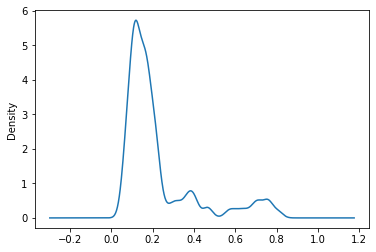

In [146]:
dados['score'].plot(kind='density')

# Separar os dataframes para testes

In [147]:
OOT = dados.loc[dados['SAFRA'] >= 200605]
OOT['SAFRA'].groupby(OOT['SAFRA']).count()

SAFRA
200605    3000
200606    3000
200607    3000
Name: SAFRA, dtype: int64

In [148]:
DEV = dados.loc[dados['SAFRA'] < 200605]
DEV['SAFRA'].groupby(DEV['SAFRA']).count()



SAFRA
200510    3000
200511    3000
200512    3000
200601    3000
200602    3000
200603    3000
200604    3000
Name: SAFRA, dtype: int64

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(DEV, test_size=0.3, random_state=123)



In [150]:
X_train.head()

,ID,SAFRA,default,Intercept,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat,pred_lin,score
10910,10911,200601,1,-0.9964,-0.3884,-0.4409,-0.3201,0.0000,-2.1458,0.104724
12563,12564,200602,0,-0.9964,-0.3884,-0.2906,0.0000,0.0000,-1.6754,0.157706
369,370,200510,1,-0.9964,0.0000,0.0000,0.0000,2.4296,1.4332,0.807399
7702,7703,200512,0,-0.9964,-0.3884,-0.2906,-0.3201,0.0000,-1.9955,0.119676
7464,7465,200512,0,-0.9964,-0.2507,-0.2906,0.0000,0.0000,-1.5377,0.176870


In [151]:
 X_train['fx_score'] = pd.qcut(X_train['score'], 5 , labels = False) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
X_train['fx_score'].value_counts()

2    3474
0    3228
4    2891
1    2723
3    2384
Name: fx_score, dtype: int64

In [153]:
quebras_desenvolvimento = list(X_train.groupby(['fx_score']).agg({'score': [np.max]})['score']['amax'])



In [154]:
quebras_desenvolvimento 

[0.1047243499625842,
 0.1387513228173017,
 0.1768698758789518,
 0.3071238885291462,
 0.8073994232218832]

In [155]:

def fx_score(score):
    if score <= quebras_desenvolvimento[0]:
        return 0
    elif score <= quebras_desenvolvimento[1]:
        return 1
    elif score <= quebras_desenvolvimento[2]:
        return 2
    elif score <= quebras_desenvolvimento[3]:
        return 3
    elif score <= quebras_desenvolvimento[4]:
        return 4
    elif score <= quebras_desenvolvimento[5]:
        return 5
    elif score <= quebras_desenvolvimento[6]:
      return 6
    return -1

X_test['fx_score'] = X_test['score'].map(fx_score)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [156]:

X_test.head()

,ID,SAFRA,default,Intercept,LIMIT_BAL_trat,PAY_AMT1_trat,AVG_PAY_trat,PAY_0_trat,pred_lin,score,fx_score
6561,6562,200512,0,-0.9964,-0.3884,0.0000,0.0000,0.0,-1.3848,0.200239,3
18315,18316,200604,0,-0.9964,-0.3884,0.0000,-0.3201,0.0,-1.7049,0.153826,2
6798,6799,200512,0,-0.9964,-0.2507,-0.2906,-0.3201,0.0,-1.8578,0.134960,1
17954,17955,200603,0,-0.9964,-0.3884,-0.2906,0.0000,0.0,-1.6754,0.157706,2
18030,18031,200604,0,-0.9964,-0.2507,-0.2906,-0.3201,0.0,-1.8578,0.134960,1


In [157]:
X_test['fx_score'].value_counts()


2    1458
0    1430
4    1240
1    1155
3    1017
Name: fx_score, dtype: int64

In [158]:
X_train.to_csv('/content/drive/MyDrive/Curso_Logistica/X_train_score.csv',index=None)
X_test.to_csv('/content/drive/MyDrive/Curso_Logistica/X_test_score.csv',index=None)


# 14. Avaliação do modelo


# Cálculo KS2

In [160]:
from scipy import stats

In [ ]:
stats.ks_2samp(X_train['score'].loc[X_train['default'] == 1], X_train['score'].loc[X_train['default'] == 0])

Ks_2sampResult(statistic=0.38614003199730923, pvalue=0.0)

In [161]:


stats.ks_2samp(X_test['score'].loc[X_test['default'] == 1], X_test['score'].loc[X_test['default'] == 0])

Ks_2sampResult(statistic=0.3780044017660223, pvalue=8.393085718670753e-137)

In [ ]:
stats.ks_2samp(OOT['score'].loc[OOT['default'] == 1], OOT['score'].loc[OOT['default'] == 0])

Ks_2sampResult(statistic=0.4034096429438912, pvalue=2.4238004152500856e-207)

In [ ]:
dados.to_csv('/content/drive/MyDrive/Curso_Logistica/dados_escorado.csv', index=None)

# Calculo KS1

In [ ]:
stats.ks_2samp(dados['score'].loc[dados['SAFRA'] >= 200605], dados['score'].loc[dados['SAFRA'] < 200605])

Ks_2sampResult(statistic=0.05895238095238098, pvalue=1.920211576415336e-19)